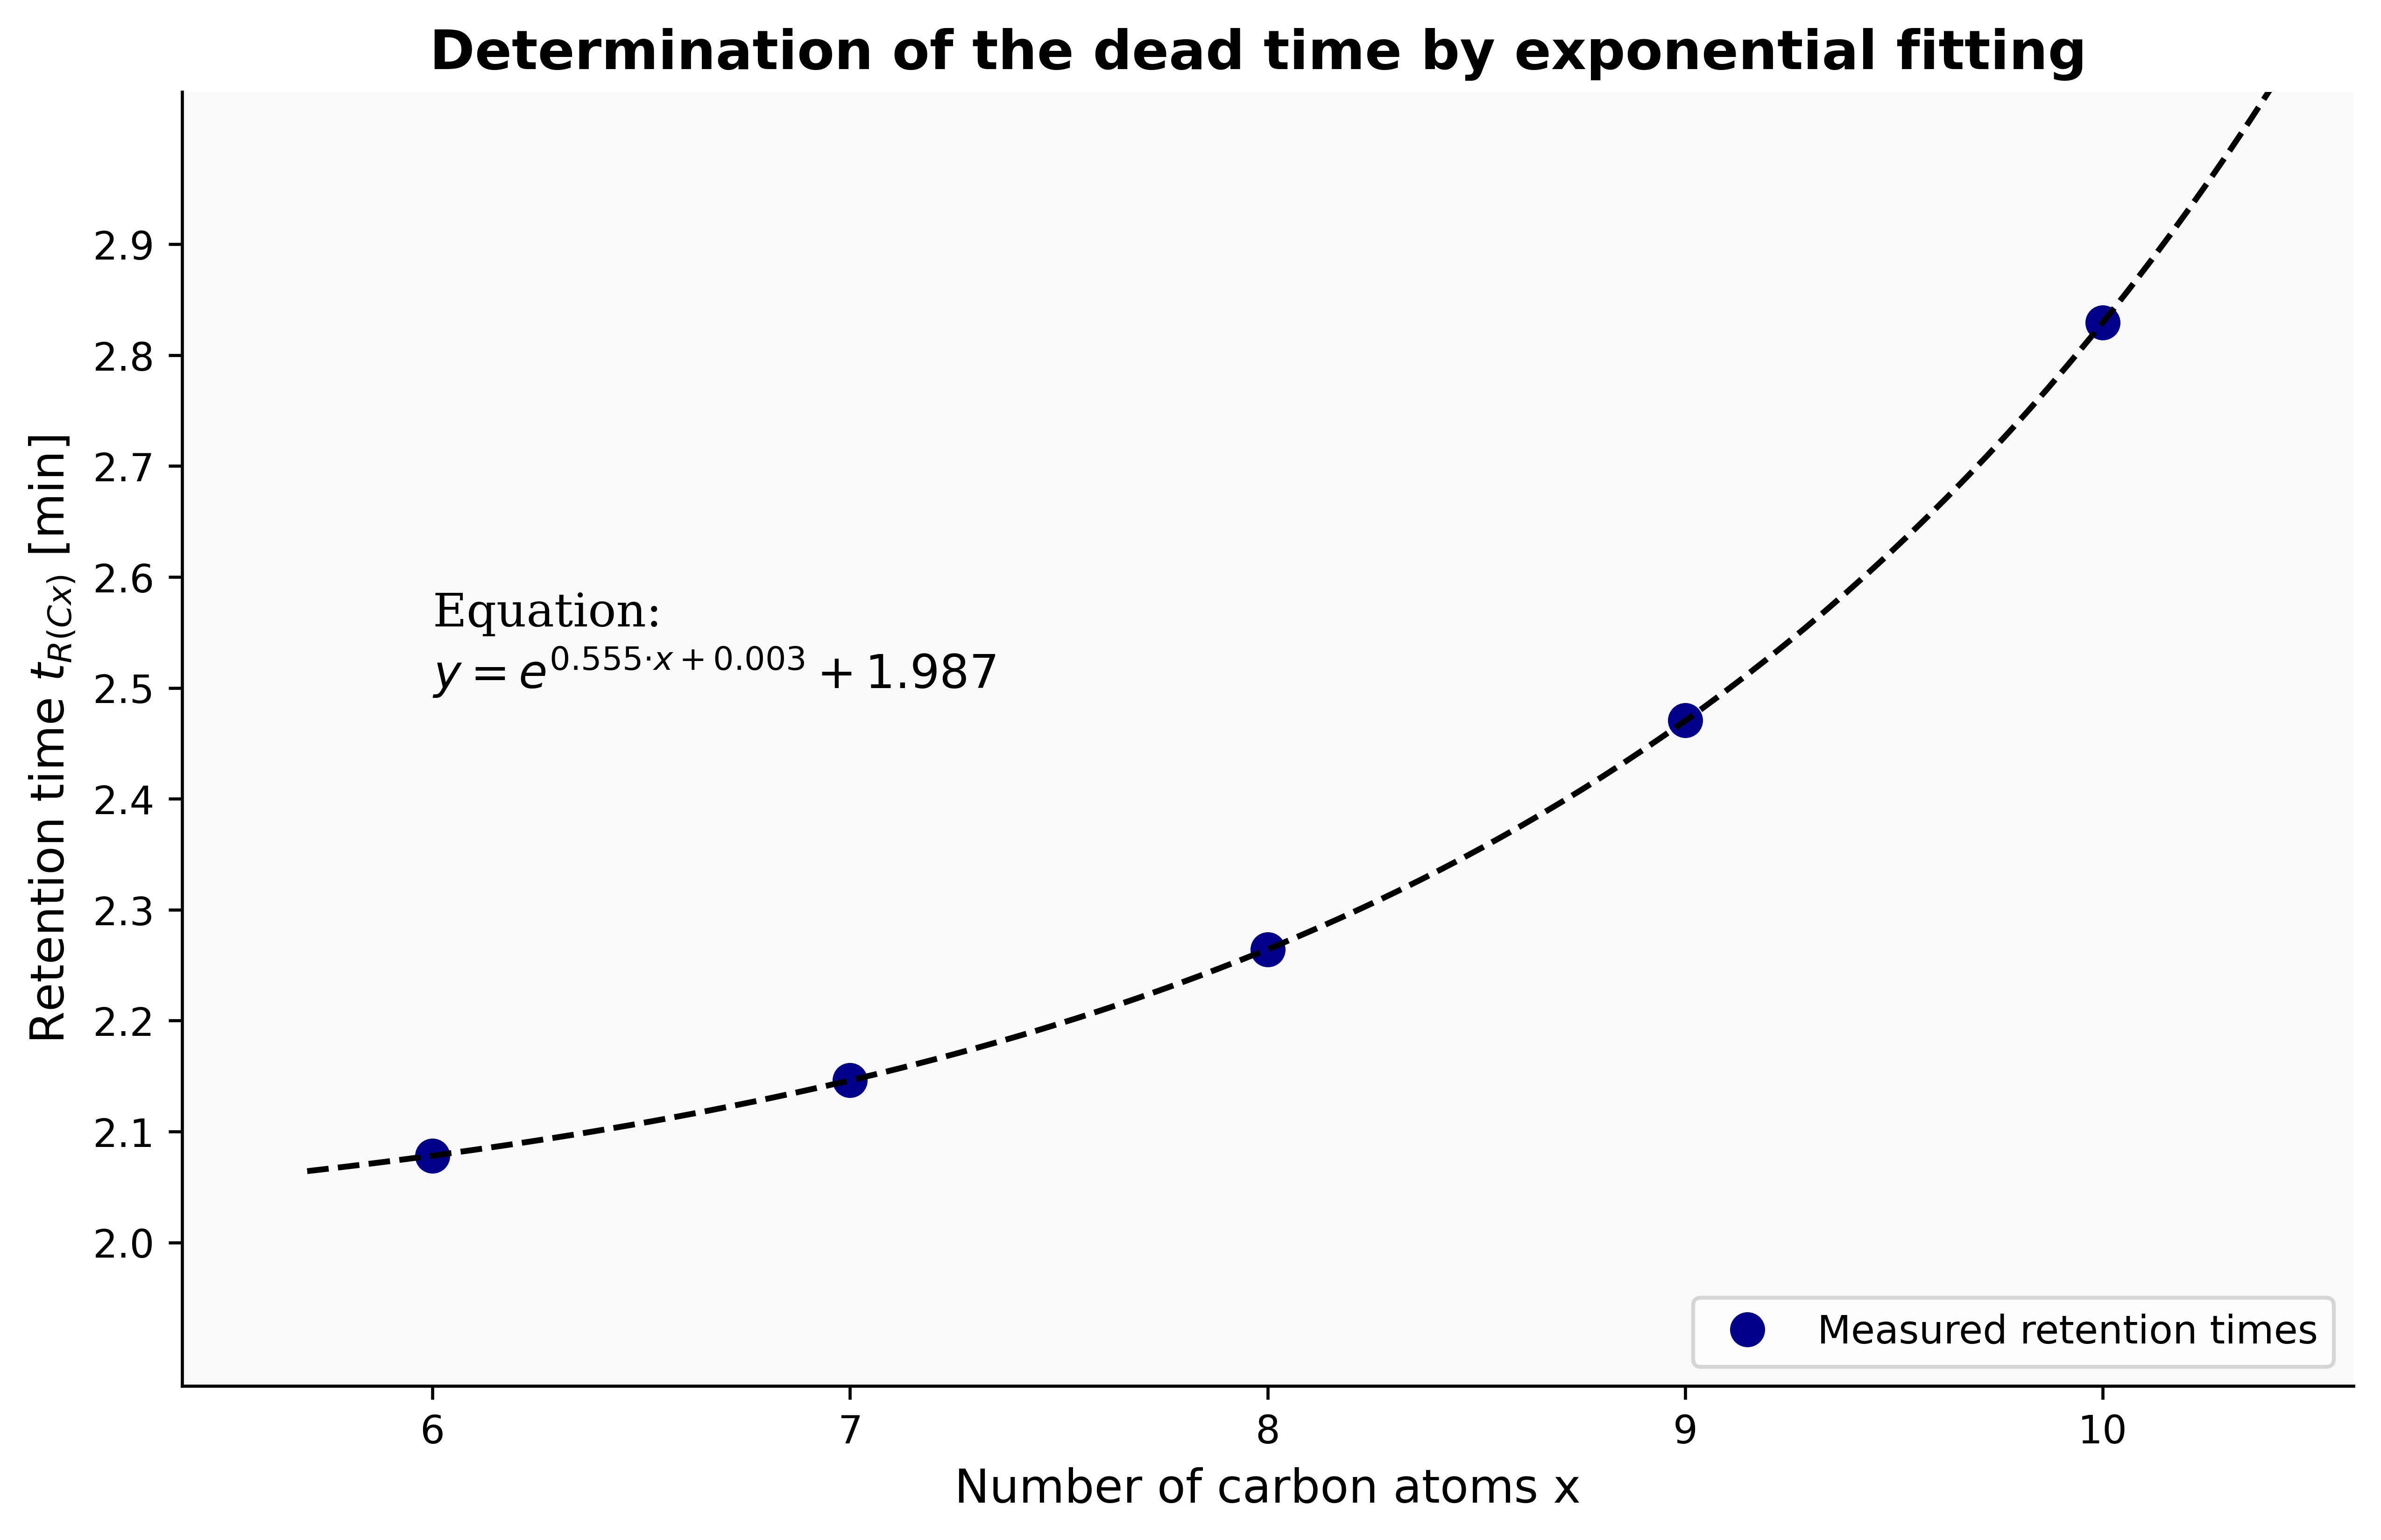

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.optimize import curve_fit


def read_excel_data(file_path):
    df = pd.read_excel(file_path, sheet_name="Temps mort", skiprows=1)
    return df

def plot_graph(data_frame):
    x = data_frame['# carbones'][0:5].tolist()
    y = data_frame['tRmoy [min]'][0:5].tolist()
    
    plt.figure(figsize=(10, 6), dpi = 600)  # Adjust figure size for better presentation

    # Plot data with specific style elements
    plt.plot(x, y, label='Measured retention times', color='darkblue', linestyle='', marker='o', markersize=8, linewidth=1.5)
    
    plt.xlabel('Number of carbon atoms x', fontsize=12)
    plt.ylabel('Retention time $t_{R(Cx)}$ [min]', fontsize=12)
    plt.title('Determination of the dead time by exponential fitting ', fontsize=14, weight='bold')

    # Adjust grid density
    plt.xticks(ticks=plt.xticks()[0][1::2], fontsize=10, rotation ='horizontal')
    plt.yticks(ticks=plt.yticks()[0][::1], fontsize=10)

    plt.grid(False)

    # Add a subtle background color
    plt.gca().set_facecolor('#f9f9f9')

    # Remove spines for cleaner appearance
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
     # Set x-axis and y-axis limits
    delta_x=min(x)*0.1
    delta_y=min(y)*0.1
    plt.xlim(min(x)-delta_x, max(x)+delta_x)
    plt.ylim(min(y)-delta_y, max(y)+delta_y)
    
    
    # Fit the function y = a * np.exp(b * x) + c to x and y
    popt, pcov = curve_fit(lambda x, a, b, c: a * np.exp(b * x) + c, x, y)
    a = popt[0]
    b = popt[1]
    c = popt[2]
    x_fitted = np.linspace(np.min(x)*0.95, np.max(x)*1.05, 100)
    fit_line = a * np.exp(b * x_fitted) + c
    eq1 = f"{b:.3f}⋅x + {a:.3f}"
    equation = f'$y = e^{{{eq1}}} + {c:.3f}$'
    
    text = f"Equation:\n"+f"{equation}"
    plt.legend(loc='lower right')
    plt.text(6, 2.5, text, fontsize=12, family = "serif" )
    
    
    
    # Plot linear regression
    plt.plot(x_fitted, fit_line, label=f'Exponential fit', color='black', linestyle='--', linewidth=1.5)
    
    
def save_svg(file_path):
    plt.savefig(file_path + ".png", format='png')  # Save as a PNG file for matplotlib

def main():
    excel_file_path = r"C:/Users/nilst/Documents/EPFL/BA_4/TP_Analytique/GC/Resultats.xlsx"
    download_folder =r"C:/Users/nilst/Documents/EPFL/BA_4/TP_Analytique/GC"

    # Read data from Excel file
    data = read_excel_data(excel_file_path)

    # Plot the graph
    plot_graph(data)
    
    # Save the graph as an SVG file and download it
    svg_file_path = os.path.join(download_folder, 'graph_temp_mort')
    save_svg(svg_file_path)
    
    plt.show()

if __name__ == "__main__":
    main()
